In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import math

In [3]:
# Define the ODE as two first-order ODEs
def f(t, y, z):
    dydt = z
    dzdt = - y
    return dydt, dzdt

In [4]:
# Initial conditions
y0 = 0
z0 = 2*math.pi
t0 = 0
t_final = 13  # Final time
h = 0.1  # Step size

# Create lists to store the solution
t_values = [t0]
y_values = [y0]
z_values = [z0]

In [5]:
# RK4 method for numerical integration
while t0 < t_final:
    k1y, k1z = f(t0, y0, z0)
    k2y, k2z = f(t0 + 0.5 * h, y0 + 0.5 * h * k1y, z0 + 0.5 * h * k1z)
    k3y, k3z = f(t0 + 0.5 * h, y0 + 0.5 * h * k2y, z0 + 0.5 * h * k2z)
    k4y, k4z = f(t0 + h, y0 + h * k3y, z0 + h * k3z)
    
    y0 = y0 + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
    z0 = z0 + (h / 6) * (k1z + 2 * k2z + 2 * k3z + k4z)
    t0 += h
    
    t_values.append(t0)
    y_values.append(y0)
    z_values.append(z0)

In [6]:
t_train=[]
y_train=[]

In [7]:
# Print the results
for t, y in zip(t_values, y_values):
    print(f"t = {t:.2f}, y = {y:.6f}")
    t_train.append(t)
    y_train.append(y)

t = 0.00, y = 0.000000
t = 0.10, y = 0.627271
t = 0.20, y = 1.248275
t = 0.30, y = 1.856807
t = 0.40, y = 2.446786
t = 0.50, y = 3.012317
t = 0.60, y = 3.547751
t = 0.70, y = 4.047736
t = 0.80, y = 4.507278
t = 0.90, y = 4.921785
t = 1.00, y = 5.287115
t = 1.10, y = 5.599618
t = 1.20, y = 5.856172
t = 1.30, y = 6.054212
t = 1.40, y = 6.191761
t = 1.50, y = 6.267445
t = 1.60, y = 6.280506
t = 1.70, y = 6.230814
t = 1.80, y = 6.118866
t = 1.90, y = 5.945781
t = 2.00, y = 5.713288
t = 2.10, y = 5.423709
t = 2.20, y = 5.079939
t = 2.30, y = 4.685411
t = 2.40, y = 4.244069
t = 2.50, y = 3.760321
t = 2.60, y = 3.239002
t = 2.70, y = 2.685319
t = 2.80, y = 2.104806
t = 2.90, y = 1.503262
t = 3.00, y = 0.886698
t = 3.10, y = 0.261275
t = 3.20, y = -0.366759
t = 3.30, y = -0.991128
t = 3.40, y = -1.605595
t = 3.50, y = -2.204018
t = 3.60, y = -2.780420
t = 3.70, y = -3.329041
t = 3.80, y = -3.844400
t = 3.90, y = -4.321346
t = 4.00, y = -4.755115
t = 4.10, y = -5.141373
t = 4.20, y = -5.476260


In [8]:
initializer = tf.keras.initializers.VarianceScaling(dtype=tf.float32)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model = tf.keras.Sequential([
   tf.keras.layers.Input(shape=(1,)),    
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  
])

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
t_tr=np.array(t_train)
y_tr= np.array(y_train)

In [12]:
history=model.fit(t_tr.reshape(-1, 1), y_tr.reshape(-1, 1), epochs=2000,batch_size=16)

Epoch 1/2000
132/132 [==============================] - 1s 4ms/sample - loss: 18.7599
Epoch 2/2000
132/132 [==============================] - 0s 172us/sample - loss: 18.5607
Epoch 3/2000
132/132 [==============================] - 0s 212us/sample - loss: 18.3712
Epoch 4/2000
132/132 [==============================] - 0s 166us/sample - loss: 18.7996
Epoch 5/2000
132/132 [==============================] - 0s 189us/sample - loss: 18.3325
Epoch 6/2000
132/132 [==============================] - 0s 185us/sample - loss: 18.2883
Epoch 7/2000
132/132 [==============================] - 0s 176us/sample - loss: 18.2448
Epoch 8/2000
132/132 [==============================] - 0s 172us/sample - loss: 18.2108
Epoch 9/2000
132/132 [==============================] - 0s 202us/sample - loss: 18.1247
Epoch 10/2000
132/132 [==============================] - 0s 168us/sample - loss: 18.0690
Epoch 11/2000
132/132 [==============================] - 0s 196us/sample - loss: 18.1305
Epoch 12/2000
132/132 [=========

In [13]:
def yAnalytic(x):
      return 2*math.pi*math.sin(x)

In [14]:
x_test = np.linspace(0, 13, 200)
y_test = model.predict(x_test.reshape(-1, 1))

In [15]:
y = np.vectorize(yAnalytic)(x_test)

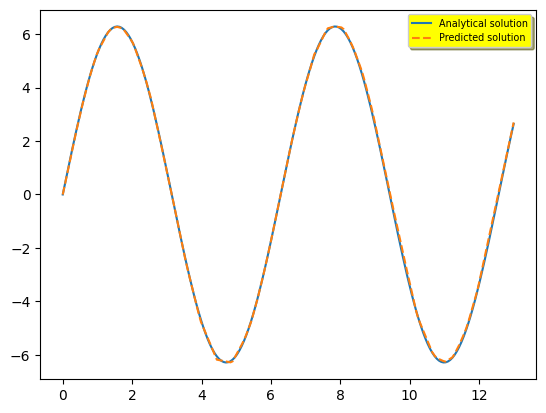

In [16]:
fig, ax = plt.subplots()
ax.plot(x_test, y, label='Analytical solution')
ax.plot(x_test, y_test,'--', label='Predicted solution')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-small')
legend.get_frame().set_facecolor('yellow')

plt.show()

In [17]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)


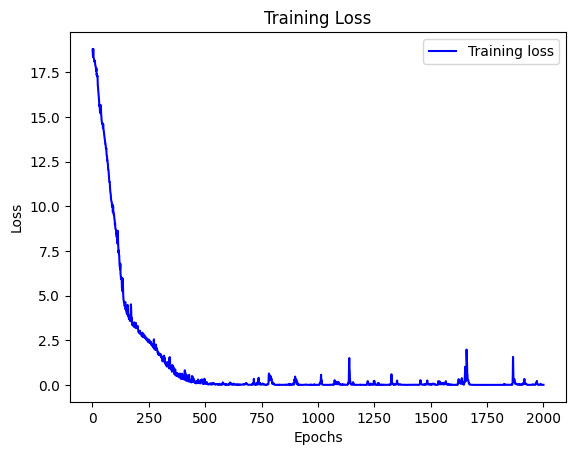

In [18]:
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()